In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
def min_value(x):
    min_x = np.zeros(len(x)-1)
    for ii, x_i in enumerate(x[:-1]):
        min_x[ii] = abs(x[ii+1] - x[ii])
    dx = np.min(min_x)
    return dx
# uniform dx selection

def interpolation(x,y):
    dx = min_value(x) 
    x_final = np.array([])
    y_final = np.array([])
    for ii, x_i in enumerate(x[:-1]):
        x_new = np.arange(x[ii],x[ii+1],dx/10)
        if ii >= len(x) - 2 :
            y_new = np.linspace(y[ii],y[ii+1],len(x_new))
        else :
            y_new = np.linspace(y[ii],y[ii+1],len(x_new),endpoint=False)
        x_final = np.append(x_final,x_new)
        y_final = np.append(y_final,y_new)
    return x_final, y_final
# Interpolation

def find_y(x,r_new,em_new): 
    dx = 0.001 /100
    y = np.where((r_new>= x-dx) & (r_new<= x+dx))[0]
    y_new=em_new[y].mean()
    return y_new

file = pd.read_csv('/home/jin/CIV_Photoionization/CIV_emissivity.txt',sep='\t',header=0)
radius,emiss= file['Radius_kpc'].to_numpy(), file['Emissivity'].to_numpy()
# plt.plot(radius,emiss)
# plt.yscale('log')
# plt.xlim(0.9,15)

ii = np.where(radius<=15)[0]
plt.plot(radius[ii],)

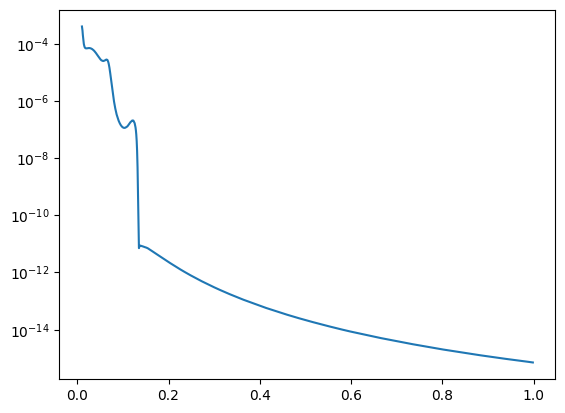

In [4]:
tt = np.sum(em_new)
density_pro = em_new / tt
plt.plot(r_new/100,density_pro)
plt.yscale('log')
name=['x','PDF']
tt = pd.DataFrame(np.column_stack((r_new/100,density_pro)),columns=name)
tt.to_csv('/home/jin/CIV_Photoionization/PDF.txt', sep='\t', index=False)

In [5]:
r_new_d,density_pro = r_new/100, density_pro
def find_y(x,r_new,em_new): 
    dx = 0.001 /100
    y = np.where((r_new>= x-dx) & (r_new<= x+dx))[0]
    y_new=em_new[y].mean()
    return y_new

In [6]:
# seed = np.random.seed(123)
N = int(1e4)
numm = np.arange(1,N+1)
r = np.zeros(N)
for ii in np.arange(1,N+1):
    x = np.random.rand()
    y = np.random.rand()*np.sqrt(1-x**2)
    z =np.random.rand()*np.sqrt(1-y**2-x**2)
    r[ii-1] = np.sqrt(np.sum([x**2,y**2,z**2]))

In [16]:
x = []
p_max = density_pro.max()
n , loop = 0 , 0 
np.random.seed(0)
while (n<10000):
    loop +=1 
    x1,x2 = np.random.random(2)
    px = find_y(x1,r_new_d,em_new)
    # print(x2 , px/p_max)
    if (find_y(x2,r_new_d,em_new) <= px/p_max):
        n+=1
        x.append(x1)

/tmp/ipykernel_6694/1083158333.py:5: RuntimeWarning: Mean of empty slice.
  y_new=em_new[y].mean()
/home/jin/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


(array([127., 138., 123., 137., 115., 119., 113., 103., 136., 112., 125.,
        106., 110.,  99., 104., 106.,  95.,  89.,  93., 104., 105.,  80.,
        108.,  99.,  96.,  99., 102., 118.,  99., 106.,  96.,  86.,  85.,
         88., 104.,  85.,  94.,  91.,  82., 107., 108., 129.,  89., 106.,
         94.,  99.,  81., 101., 102., 105.,  86.,  88.,  97., 118., 101.,
        106.,  94., 104.,  94., 102.,  91., 102.,  99.,  85.,  96.,  93.,
         99., 111.,  90., 103., 103.,  85.,  96.,  96., 106.,  86.,  78.,
        100., 107.,  79.,  94.,  93.,  88.,  79.,  96.,  92.,  92.,  76.,
         96.,  92.,  77.,  91., 112., 106.,  84.,  95.,  97.,  84.,  82.,
         90.,  91.]),
 array([0.01037942, 0.02016076, 0.0299421 , 0.03972344, 0.04950478,
        0.05928612, 0.06906745, 0.07884879, 0.08863013, 0.09841147,
        0.10819281, 0.11797415, 0.12775549, 0.13753683, 0.14731817,
        0.15709951, 0.16688085, 0.17666219, 0.18644353, 0.19622487,
        0.20600621, 0.21578755, 0.225568

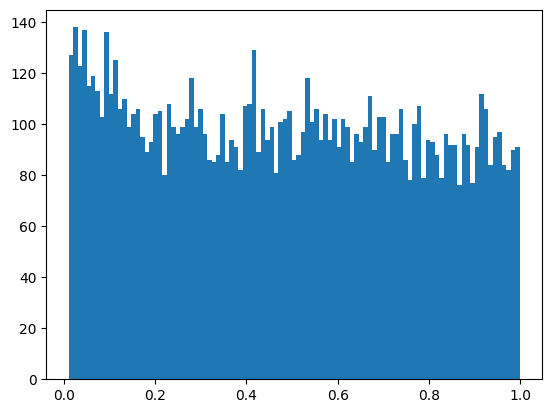

In [17]:
plt.hist(x,bins=101)